<a name="début"></a>

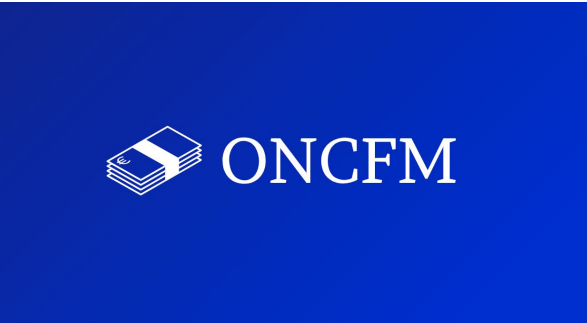

# Projet 10
# Détectez des faux billets



<ul>
    <li> <a href=#p10100>I.    Importer les bibliothèques. </a></li>
    <li> <a href=#p10200>II.   Impoter les fichiers dans un dataframe. </a></li> 
    <li> <a href=#p10300>III.  Nettoyage des données  </a></li>
    <li> <a href=#p10500>IV. Détermination du modèle de prediction.</a></li>  
    <li> <a href=#p10600>V. Détermination des valeurs manquantes.</a></li> 
    <li> <a href=#p10700>VI. Analyse descriptive.</a></li>
    

         
</ul>

<a href=#début>Menu principal. </a>

 <a href=#NB>NB.  Convention d'écriture pep 8. </a>

<a name="p10100"></a>

<h6><i> I. Importer les bibliothèques. </i></h6>

In [98]:
# ==========================================================    
# on importe les Bibliotéques panda et le fichier fonction
#
#                            ~oOo~
# ==========================================================           


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn import preprocessing, cluster, metrics, decomposition
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

def heatmap_corr(i) :

    plt.figure(figsize=(15,10))

    mask = np.zeros_like(i.corr())
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(i.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

    plt.xticks(rotation=25, ha='right')
    plt.title('Triangle de Corrélation',  fontsize=18, pad=20)

    plt.show()
    


<a href=#début>Menu principal. </a>

<a name="p10200"></a>

## II.  Impoter les fichiers dans un dataframe.

In [99]:
# ==========================================    
#   on importe les fichiers dans un dataframe
#
#                 ~oOo~
# ==========================================      

#import data
billets = pd.read_csv('C:/Users/pjani/Documents/projet 10/data/billets.csv',sep=";")


<a href=#début>Menu principal. </a>

<a name="p10300"></a>

## III. Nettoyage des données 

In [100]:
#type de variables

billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [101]:
#nombre de valeur null

billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [102]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


<a href=#début>Menu principal. </a>

<a name="p10400"></a>

<h6><i>  Préparation du Data Frame. </i></h6>

In [103]:
#on normalise le label is-genuine .
# True=1, False=0

encodeur=LabelEncoder()
billets["is_genuine"]=encodeur.fit_transform(billets.is_genuine.values)

billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [104]:
#  on sépare le dataFrame en deux, valeurs complètes et valeurs manquantes 

idx=billets[billets["margin_low"].isna() == True].index
incomplet=billets.loc[idx]
complet=billets.drop(idx)



In [105]:
print(f"incomplet\n")
incomplet.head(5)

incomplet



,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36


In [106]:
print(f"complet\n")
complet.head(5)

complet



,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


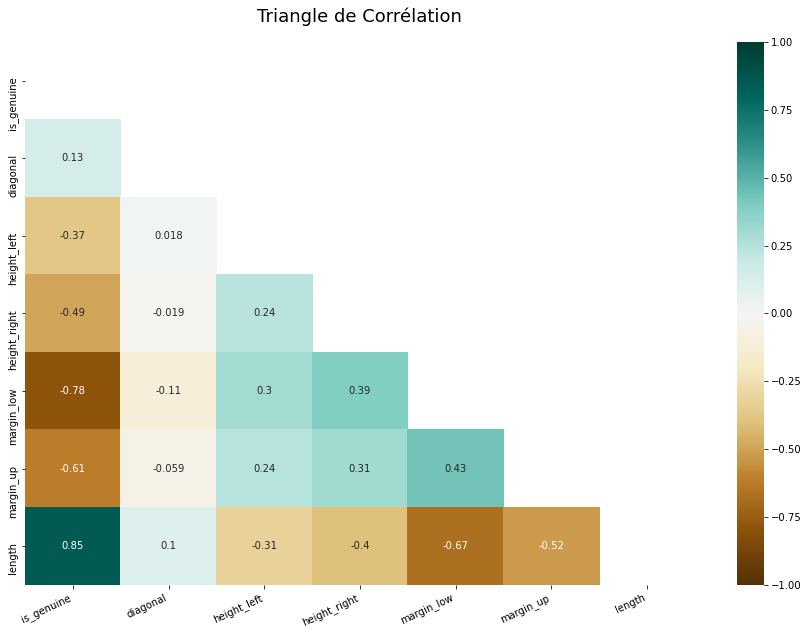

In [107]:
# on affiche le cercle des corrélations 

heatmap_corr(complet)

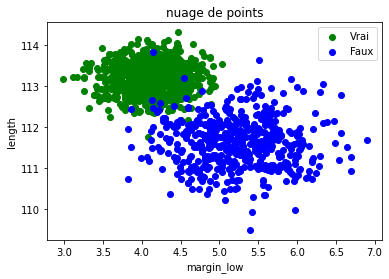

In [108]:
#on constate un forte corrélation entre la valeur target et les variables "lenght" et "is_genuine"
# on visualise margin_low en fonction de length

margin_lowTrue=complet[complet["is_genuine"]== 1]["margin_low"].values
margin_lowFalse=complet[complet["is_genuine"]== 0]["margin_low"].values

lengthTrue=complet[complet["is_genuine"]== 1]["length"].values
lengthFalse=complet[complet["is_genuine"]== 0]["length"].values

fig, ax = plt.subplots()
ax.scatter(margin_lowTrue,lengthTrue,c="g", label="Vrai")
ax.scatter(margin_lowFalse,lengthFalse,c="b",label="Faux")
ax.set_title("nuage de points")
ax.set_xlabel("margin_low")
ax.set_ylabel("length")
plt.legend()
plt.show()

In [109]:
#on créer les data frame trainning et target 

completExplicative=complet.drop(columns={"margin_low"})
completTarget=pd.DataFrame(complet.iloc[:,4])

incompletExplicative=incomplet.drop(columns={"margin_low"})
incompletTarget=pd.DataFrame(incomplet.iloc[:,4])



<a href=#début>Menu principal. </a>

<a name="p10500"></a>

## IV. Détermination du modèle de prediction.

In [110]:
# Nous allons tester deux modèle: "régression lineaire lasso" et "KNeighborsRegressor" pour déterminer 
# le quel serait le meilleur pour prédire les valeurs manquantes.
# la première optimise un écart par apport une droit théorique, la second détermine une valeur par appor
# "à un proche voisin".

In [111]:
#  on créer deux data set, un trainning et un testing, de facon aléatoire 80%, 20%

x_train, x_test, y_train, y_test = train_test_split(completExplicative, completTarget, test_size=0.20)


###  regression lineaire lasso

In [124]:
#===============================
# la regression de lasso
#
#         ~oOo~
# ===============================

# la regression de "lasso" reprend les principes de la regression de "ridge", en limitant le poids des coefficients 
# par l'intémédiare d'un paramètre alpha, celà permet de :
# d'amoindrir les problèmes de colinéarité,
# tous les facteurs gardent leurs significacités.

# la regression est obtenue par la somme des valeurs absolues et plus par la somme quadratique.


In [125]:
#on optimise la regression avec LAssoCV (pour cross validation)
#initialise le modèle
regressor=LassoCV(n_alphas=500)
#créer le modèle par apprentissage
regressor.fit(x_train,y_train)

#détermine les valeurs
pred_y=regressor.predict(x_test)

#pred_y=list(pred_y)
#print(pred_y)

In [126]:
# on calcule la perfomance du modèle R²
# ce qui revient à faire 
#pred_y=regressor.predict(x_test)
# =>r2_score(y_test.values,pred_y)

score=round(regressor.score(x_test,y_test)*100,2)

print("rmse:",np.sqrt(metrics.mean_squared_error(y_test,pred_y)))
print(f"le modèle a une perfomance de:{score}%")

rmse: 0.3915697850585683
le modèle a une perfomance de:64.42%


### Knn

In [127]:
#===============================
# K Nearest Neighbors
# 
#         ~oOo~
# ===============================

# l'algorithme renvoie la moyenne des valeurs de la variable cible.
# le nombre de voisin "K" est déterminant.  


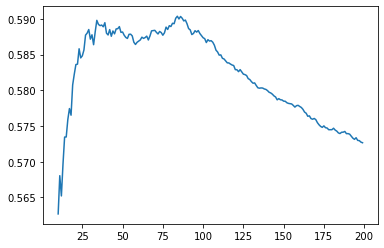

In [128]:
#on determine les bornes  de n_neighbors avec validation_curve

modelA= KNeighborsRegressor(weights="uniform"
                           )
k=np.arange(10,200)
train_score, val_score=validation_curve(modelA, 
                                        x_train, 
                                        y_train,
                                        'n_neighbors',
                                        k, 
                                        cv=5)
plt.plot(k, val_score.mean(axis=1))
#plt.plot(k, train_score.mean(axis=1))


In [129]:
n_neighbors=np.arange(25,100)# on borne n_neighbors
weights=["uniform","distance"]# avec pondération ou sans

#print("n_neighbors",n_neighbors)
#print("weights",weights)

In [130]:
#on cherche les meilleurs paramètres


model= KNeighborsRegressor()
param_grid={"n_neighbors": n_neighbors, 
            "weights" :weights
           }
            

grid= GridSearchCV (model, 
                    param_grid=param_grid,
                    cv=5
                    )

grid.fit(x_train,y_train)

print("best_estimator:",grid.best_estimator_)
print("best_params:",grid.best_params_)


gridBest=grid.best_estimator_
print("best_score:",round(gridBest.score(x_test,y_test)*100,2),"%")

bestKnnRegressor=grid.best_estimator_

best_estimator: KNeighborsRegressor(n_neighbors=84, weights='distance')
best_params: {'n_neighbors': 84, 'weights': 'distance'}
best_score: 63.88 %


#### Avec un score suppérieur au "KNN", on sélection la regression de lasso pour déterminer les valeurs manquentes 

<a href=#début>Menu principal. </a>

<a name="p10600"></a>

## V. Détermination des valeurs manquantes.

In [131]:
#on remplace les nan par les valeurs de predict
billets.loc[billets.margin_low.isna(), 'margin_low'] = regressor.predict(incompletExplicative)

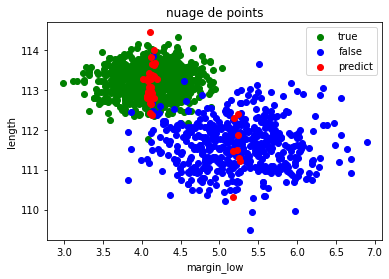

In [132]:
# on visualise la prediction

margin_lowTrue=complet[complet["is_genuine"]== 1]["margin_low"].values
margin_lowFalse=complet[complet["is_genuine"]== 0]["margin_low"].values

#length=complet["length"].values
lengthTrue=complet[complet["is_genuine"]== 1]["length"].values
lengthFalse=complet[complet["is_genuine"]== 0]["length"].values

#les points de la prediction
margin_low=regressor.predict(incompletExplicative)
length=incompletExplicative["length"]

#le graphique
fig, ax = plt.subplots()
ax.scatter(margin_lowTrue,
            lengthTrue,
            c="g",
            label="true"
            )


ax.scatter(margin_lowFalse,
            lengthFalse,
            c="b",
            label="false"
           )
ax.scatter(margin_low,
            length,
            c="red",
            label="predict"
           )


ax.set_title("nuage de points")
ax.set_xlabel("margin_low")
ax.set_ylabel("length")
plt.legend()
plt.show()

<a href=#début>Menu principal. </a>

<a name="p10700"></a>

### VI. Analyse descriptive.

In [133]:
#on inverse la normalisation du label is-genuine .
# True=1, False=0


billets["is_genuine"]=encodeur.inverse_transform(billets.is_genuine.values)


In [134]:
billets.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### Analyse univariée

In [135]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.482698,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659816,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.027713,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [136]:
# liste des boxplots

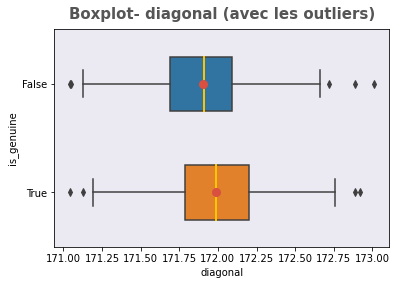

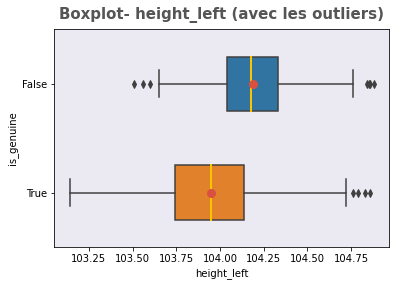

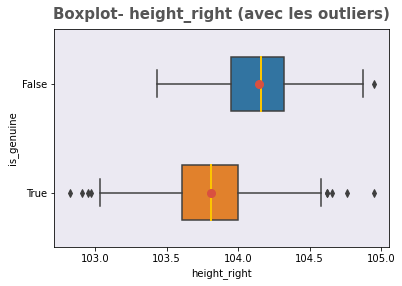

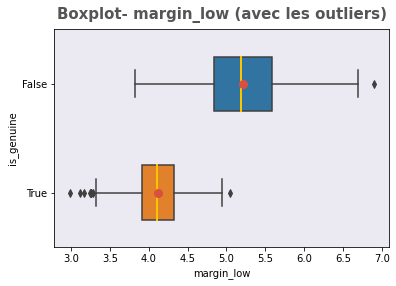

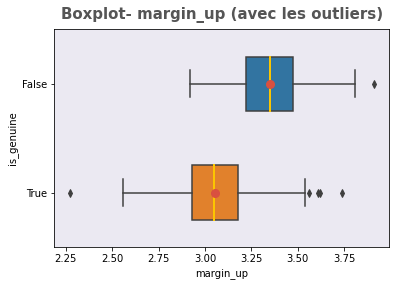

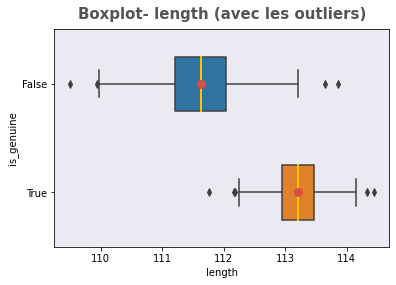

In [137]:

medianprops = {
        'color': '#fcc500',
        'linewidth': 2
    }
    
meanprops = {
        'marker': 'o',
        'markersize': 8,
        'markeredgecolor': '#d95040',
        'markerfacecolor': '#d95040'
    }
   
for variable in billets.columns[1:7]:
    ax=sns.boxplot(
        x = billets[variable], 
        y = billets.is_genuine,
        orient = "h",
        medianprops = medianprops, 
        showmeans=True, 
        meanprops=meanprops,
        width=.5,
        
    )
    ax.set_facecolor('#ebe9f2')
    #ax.grid(color='#FFFFFF', linestyle='-')
    #titre
    fontsize = 15
    color = '#555555'
    fontweight = 'bold'
    y=1.02
    title=f"Boxplot- {variable} (avec les outliers)"
    ax.set_title(title, 
                 fontsize=fontsize, 
                 y=y, 
                 color=color, 
                 fontweight=fontweight
                )
    plt.show()
        


### Analyse multivariée

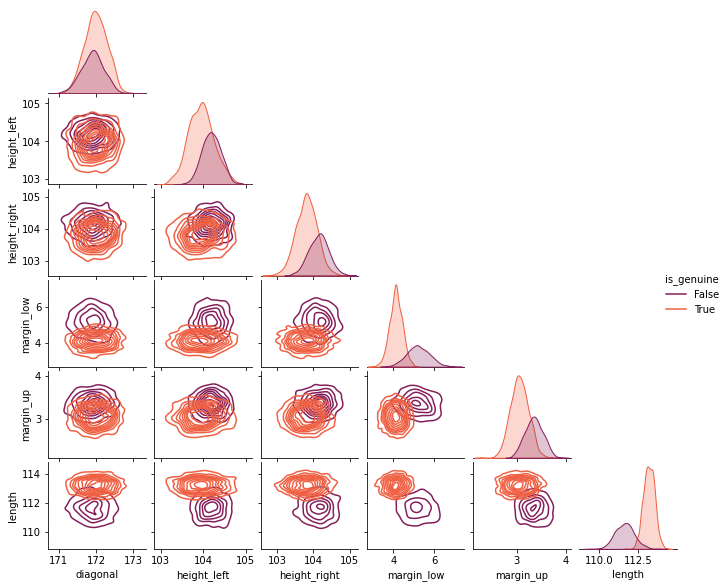

In [139]:
ax = sns.pairplot(billets, 
                 hue='is_genuine', 
                 corner=True,
                 kind="kde",
                 palette="rocket"
                 )
                
ax.fig.set_size_inches(10,8)
#ax.set(style="ticks", color_codes=True)
#ax.map_lower(sns.kdeplot, levels=2, color='.2')
plt.show()

In [140]:
#Les dimensions qui permettent vraiment de distinguer les vrais des faux billes sont length et margin_low
#(peut de recouvrement des densités).



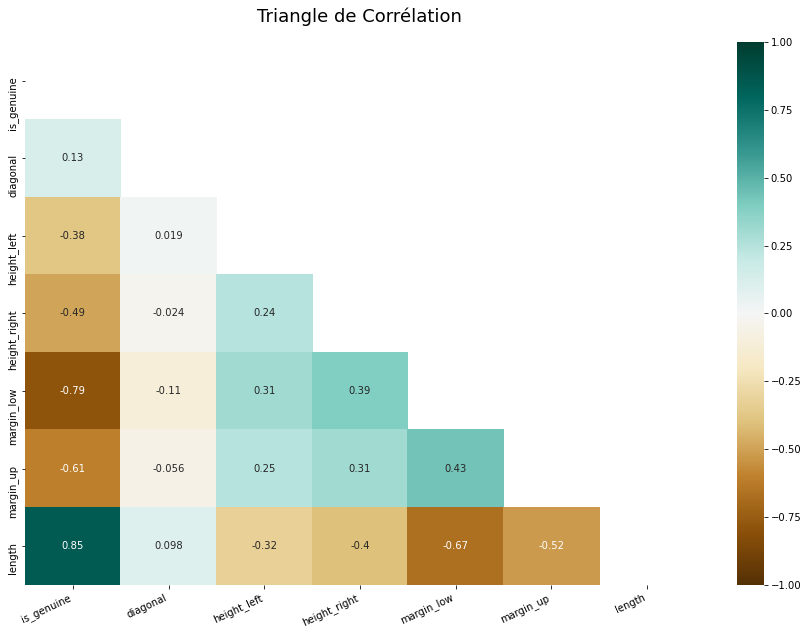

In [141]:
# on affiche le cercle des corrélations 

heatmap_corr(billets)

In [142]:
billets.to_csv("C:/Users/pjani/Documents/projet 10/data/billets_nettoye.csv",index=False)

<h6><i>NB. Convention d'écriture PEP 8</i></h6><a name="NB"></a>



Une indentation sera utilisée dès le deuxième paramètre ou condition
Une indentation sera utilisée dès le deuxième enchènement de méthode
    ex 
    . print("les valeurs à contrôler",
            "\n",
            calculCa4
            )
            
            
    . calculCa4=calculCa2[calculCa2.price>=outlet_supp
                         ].drop(columns={"total_sales",
                                         "ca"
                                        }
                                )
    


<a href=#début>Retour au code. </a>